# Emotional Analysis
## EmoBank Dataset labelled with Ekman model arpanghoshal_EkmanClassifier - Antonio Pagnotta

In [357]:
import np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [358]:
data = pd.read_csv('ekman_predictions_arpanghoshal_EkmanClassifier.csv')

In [359]:
data.head()

,V,A,D,text,predicted_emotion
0,3.00,3.00,3.20,"Remember what she said in my last letter? """,neutral
1,2.80,3.10,2.80,If I wasn't working here.,neutral
2,3.00,3.00,3.00,"..""",neutral
3,3.44,3.00,3.22,Goodwill helps people get off of public assist...,joy
4,3.55,3.27,3.46,Sherry learned through our Future Works class ...,neutral


In [360]:
print("Dataset shape: ")
print(data.shape)

Dataset shape: 
(10062, 5)


Rimuoviamo la colonna 'text', non è rilevante per l'analisi (poiché le frasi sono già state classificate).

In [361]:
no_text_data = data[['V', 'A', 'D', 'predicted_emotion']]
no_text_data.head()

,V,A,D,predicted_emotion
0,3.00,3.00,3.20,neutral
1,2.80,3.10,2.80,neutral
2,3.00,3.00,3.00,neutral
3,3.44,3.00,3.22,joy
4,3.55,3.27,3.46,neutral


Controlliamo i possibili valori di predicted_emotion

In [362]:
print("Predicted Emotions = ", no_text_data['predicted_emotion'].unique(), "\n")

Predicted Emotions =  ['neutral' 'joy' 'surprise' 'sadness' 'anger' 'fear' 'disgust'] 


Calcoliamo le statistiche descrittive per ogni emozione

In [363]:
for emotion in no_text_data['predicted_emotion'].unique():
    subset = no_text_data[no_text_data['predicted_emotion'] == emotion]
    print(f"Statistiche per '{emotion}':")
    print(subset[['V', 'A', 'D']].describe())

Statistiche per 'neutral':
                 V            A            D
count  7689.000000  7689.000000  7689.000000
mean      2.949138     3.008867     3.054826
std       0.296889     0.244783     0.196875
min       1.570000     1.870000     2.000000
25%       2.820000     2.880000     3.000000
50%       3.000000     3.000000     3.000000
75%       3.100000     3.120000     3.180000
max       4.330000     4.220000     4.200000
Statistiche per 'joy':
                 V            A            D
count  1480.000000  1480.000000  1480.000000
mean      3.282534     3.155608     3.144250
std       0.363391     0.277579     0.208849
min       1.570000     1.800000     2.140000
25%       3.087500     3.000000     3.000000
50%       3.250000     3.110000     3.120000
75%       3.500000     3.300000     3.290000
max       4.600000     4.400000     4.100000
Statistiche per 'surprise':
                V           A           D
count  510.000000  510.000000  510.000000
mean     2.873196    3.11745

Contiamo quanti valori ci sono per ogni tipo di emozione

In [364]:
print(no_text_data['predicted_emotion'].value_counts())
print("\n")

predicted_emotion
neutral     7689
joy         1480
surprise     510
anger        191
sadness      127
fear          52
disgust       13
Name: count, dtype: int64



Controlliamo la distribuzione dei valori di Valence, Arousal e Dominance per ogni emozione

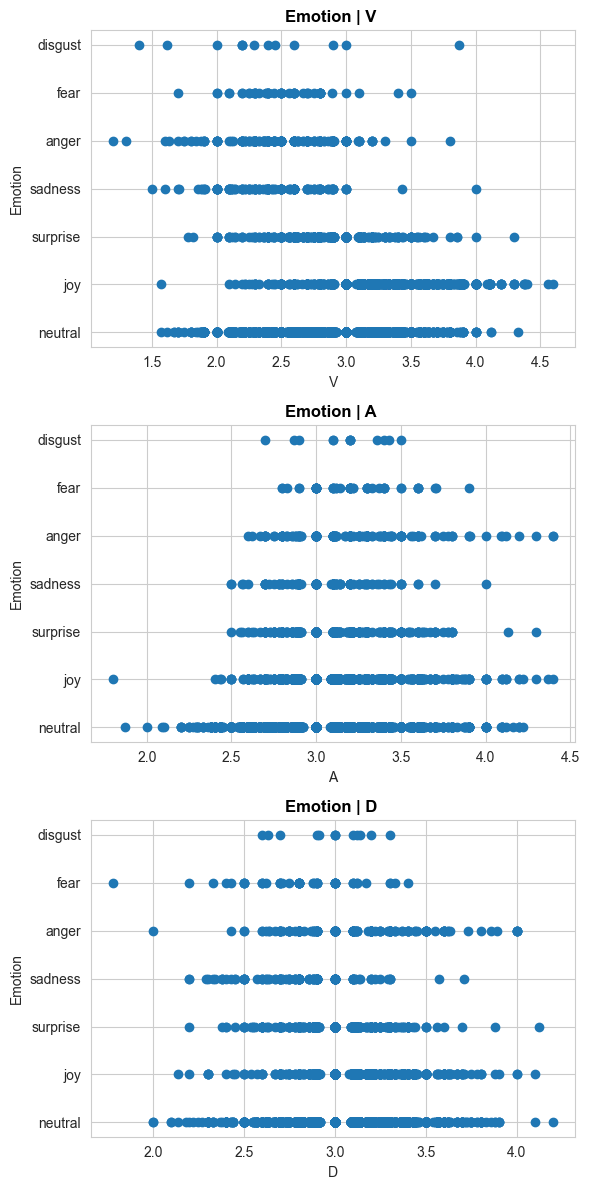

In [365]:
columns = ['V', 'A', 'D']
fig, axs = plt.subplots(3, 1, figsize=(6, 12))
for i, column in enumerate(columns):
    axs[i].plot(no_text_data[column], no_text_data['predicted_emotion'], 'o')
    axs[i].set_title(f'Emotion | {column} ', fontsize=12, fontweight='bold', color='black')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Emotion')
plt.tight_layout()
plt.show()

Varianza:                           V         A         D
predicted_emotion                              
anger              0.149679  0.119656  0.108090
disgust            0.392794  0.055209  0.047224
fear               0.108116  0.061649  0.090172
joy                0.132053  0.077050  0.043618
neutral            0.088143  0.059919  0.038760
sadness            0.132182  0.061621  0.069542
surprise           0.103053  0.060103  0.045524

Media:                           V         A         D
predicted_emotion                              
anger              2.514188  3.217173  3.117592
disgust            2.394615  3.166154  2.969231
fear               2.526923  3.222308  2.817500
joy                3.282534  3.155608  3.144250
neutral            2.949138  3.008867  3.054826
sadness            2.435512  3.054016  2.834488
surprise           2.873196  3.117451  3.009647


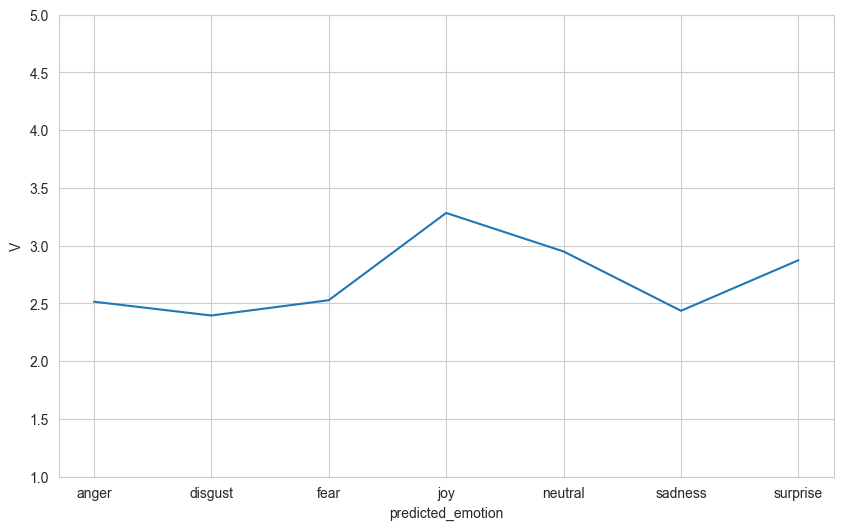

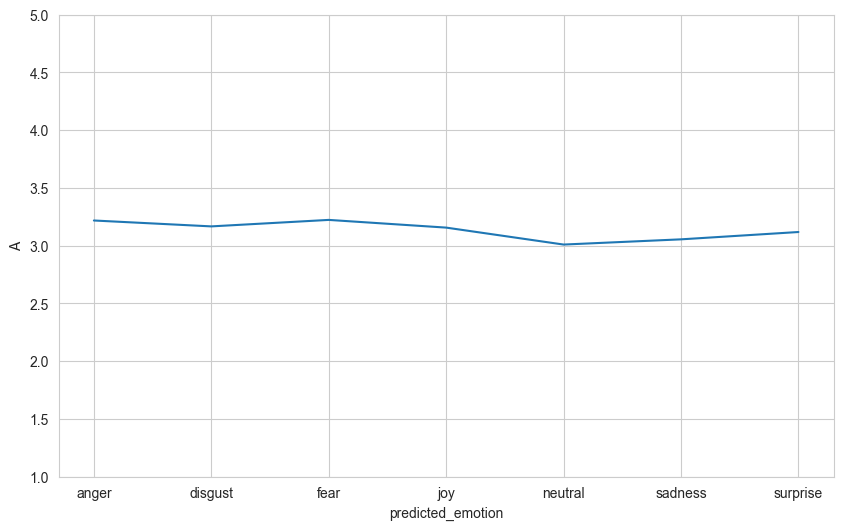

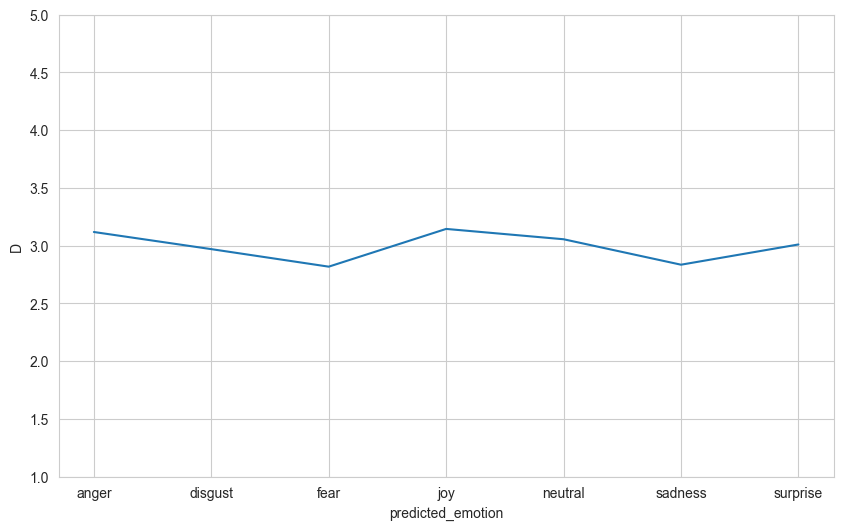

In [366]:
mean_values_by_emotion = no_text_data.groupby('predicted_emotion')[['V', 'A', 'D']].mean()
variance_values_by_emotion = no_text_data.groupby('predicted_emotion')[['V', 'A', 'D']].var()

print(f"Varianza: {variance_values_by_emotion}\n")
print(f"Media: {mean_values_by_emotion}")

fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=mean_values_by_emotion, x='predicted_emotion', y='V', ax=ax)
ax.set_ylim(1, 5)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=mean_values_by_emotion, x='predicted_emotion', y='A', ax=ax)
ax.set_ylim(1, 5)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=mean_values_by_emotion, x='predicted_emotion', y='D', ax=ax)
ax.set_ylim(1, 5)
plt.show()

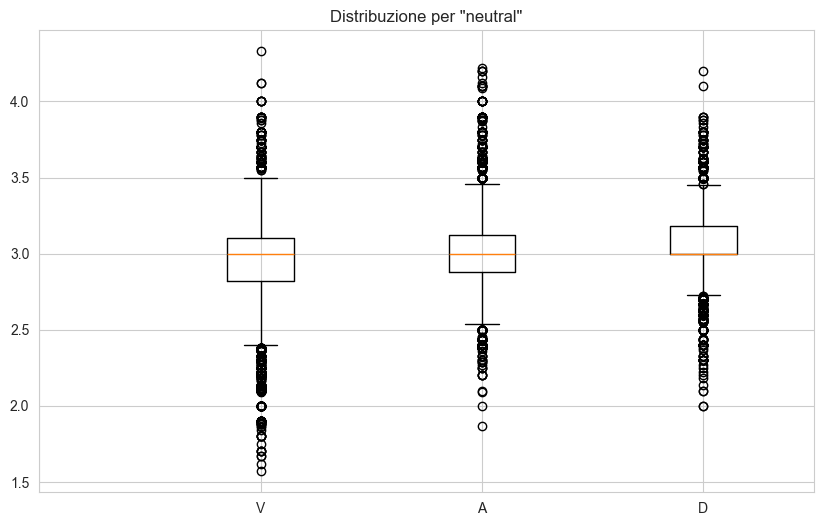

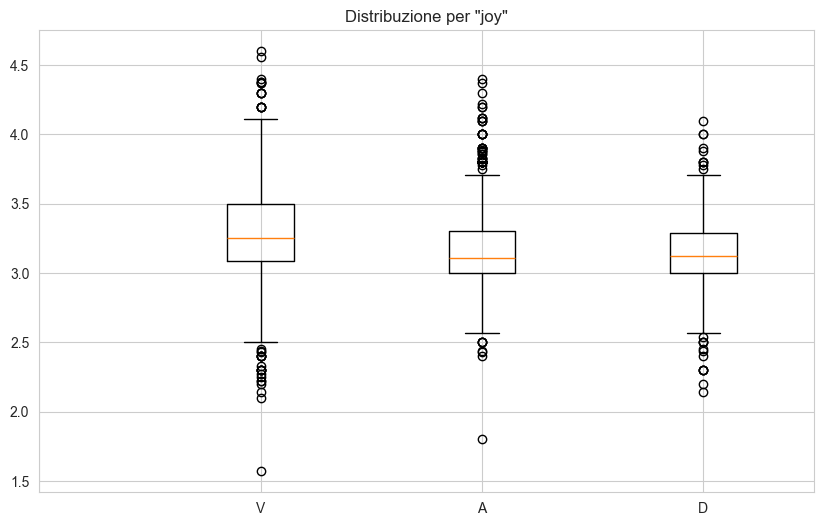

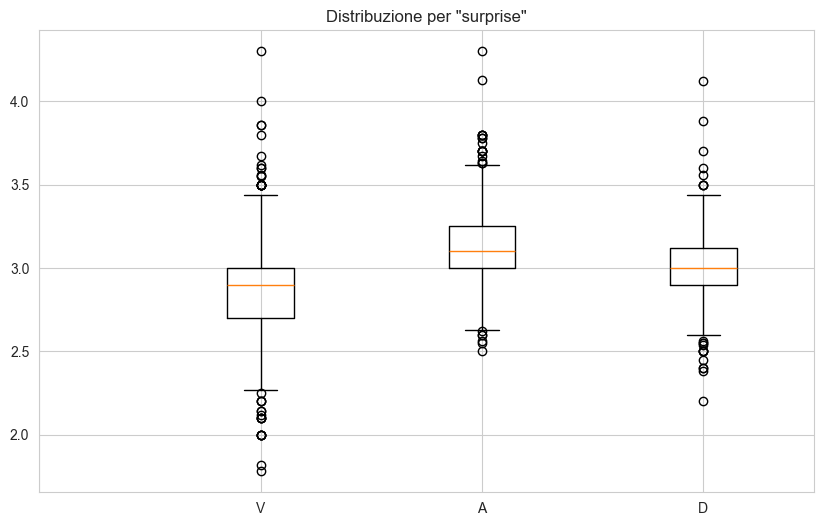

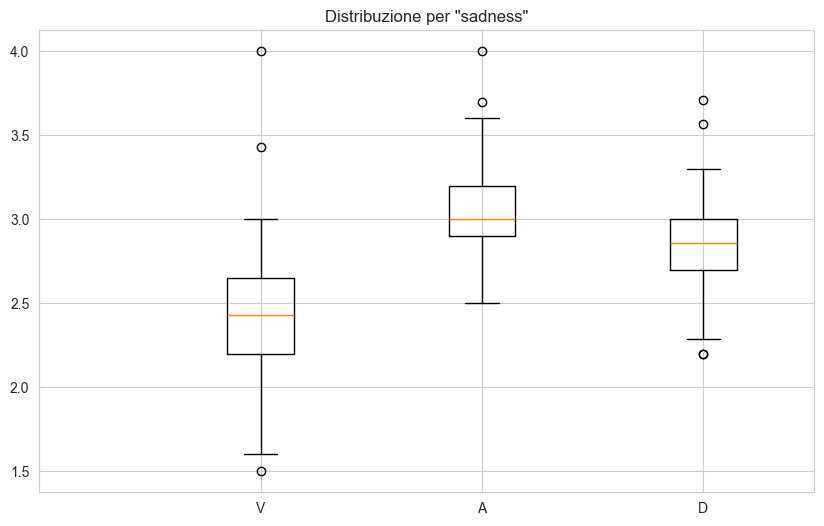

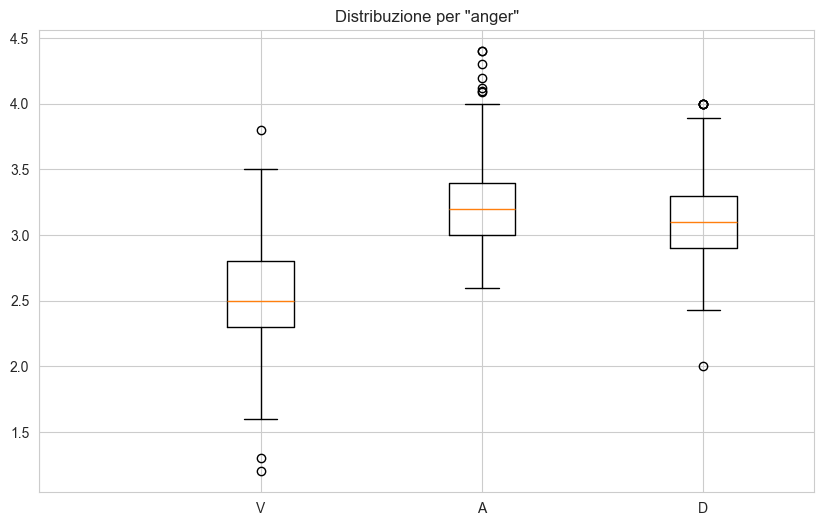

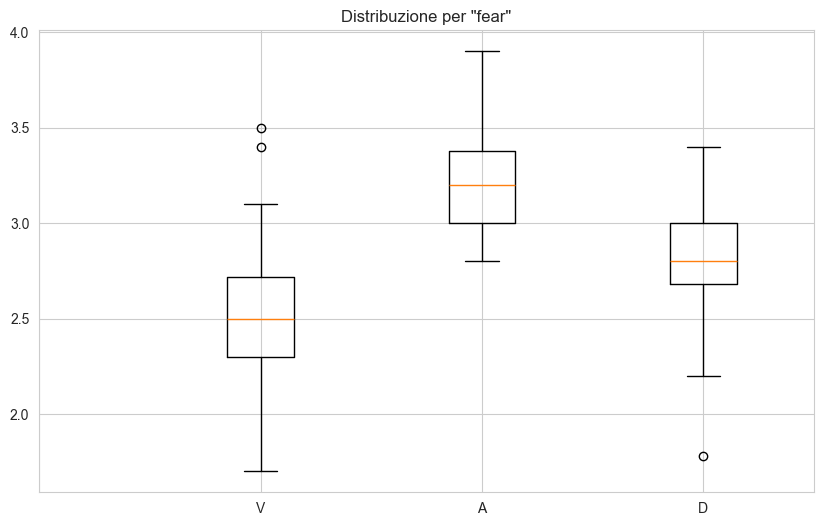

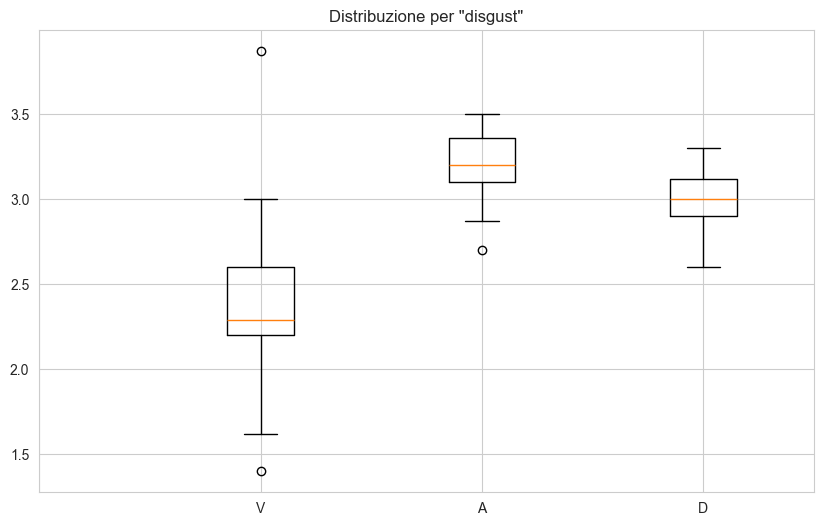

In [367]:
emotions = no_text_data['predicted_emotion'].unique()

for emot in emotions:
    plt.figure(figsize=(10, 6))
    plt.title(f'Distribuzione per "{emot}"')
    plt.boxplot([no_text_data[no_text_data['predicted_emotion'] == emot]['V'], no_text_data[no_text_data['predicted_emotion'] == emot]['A'], no_text_data[no_text_data['predicted_emotion'] == emot]['D']])
    plt.xticks([0, 1, 2, 3], [' ', 'V', 'A', 'D'])
    plt.show()

In [368]:
#encoding emozioni
no_text_data.replace({'predicted_emotion':{'anger':0,'disgust':1,'fear':2,'joy':3, 'sadness':4, 'surprise':5, 'neutral':6}},inplace=True)
no_text_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10062 entries, 0 to 10061
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   V                  10062 non-null  float64
 1   A                  10062 non-null  float64
 2   D                  10062 non-null  float64
 3   predicted_emotion  10062 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 314.6 KB


/var/folders/vw/nm4pm2012rj1j5k7yc6x23bw0000gn/T/ipykernel_62113/1539711505.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_text_data.replace({'predicted_emotion':{'anger':0,'disgust':1,'fear':2,'joy':3, 'sadness':4, 'surprise':5, 'neutral':6}},inplace=True)


In [369]:
no_text_data.head()

,V,A,D,predicted_emotion
0,3.00,3.00,3.20,6
1,2.80,3.10,2.80,6
2,3.00,3.00,3.00,6
3,3.44,3.00,3.22,3
4,3.55,3.27,3.46,6


<Axes: >

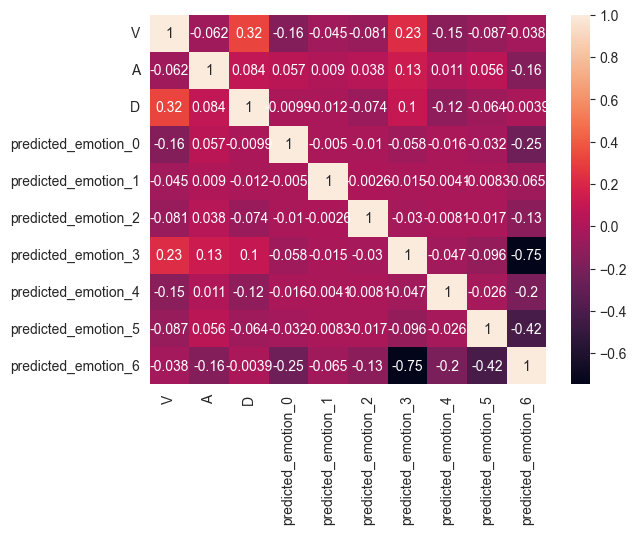

In [370]:
df_encoded = pd.get_dummies(no_text_data, columns=['predicted_emotion'])
for column in df_encoded.columns:
        df_encoded[column] = df_encoded[column].astype(int)
corr = df_encoded.corr()
sns.heatmap(corr, annot= True)

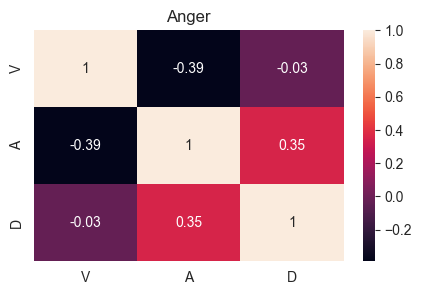

In [371]:
joy = no_text_data.loc[no_text_data.predicted_emotion == 0]
joy = joy[['V', 'A', 'D']]
corr_mat_joy = joy.corr().round(2)
plt.figure(figsize=(5,3))
plt.title("Anger")
plot = sns.heatmap(corr_mat_joy, annot=True)

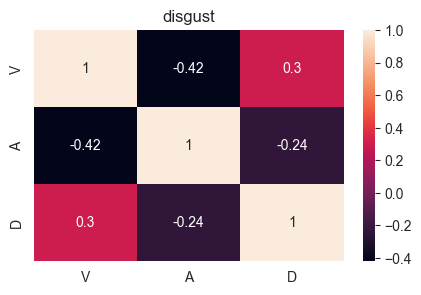

In [372]:
anticipation = no_text_data.loc[no_text_data.predicted_emotion == 1]
anticipation = anticipation[['V', 'A', 'D']]
corr_mat_anticipation = anticipation.corr().round(2)
plt.figure(figsize=(5,3))
plt.title("disgust")
plot = sns.heatmap(corr_mat_anticipation, annot=True)

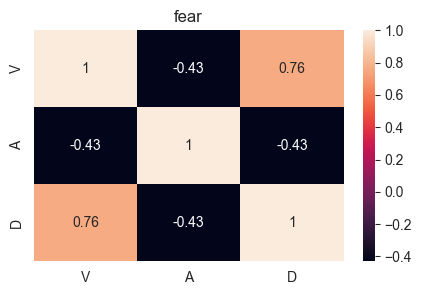

In [373]:
surprise = no_text_data.loc[no_text_data.predicted_emotion == 2]
surprise = surprise[['V', 'A', 'D']]
corr_mat_surprise = surprise.corr().round(2)
plt.figure(figsize=(5,3))
plt.title("fear")
plot = sns.heatmap(corr_mat_surprise, annot=True)

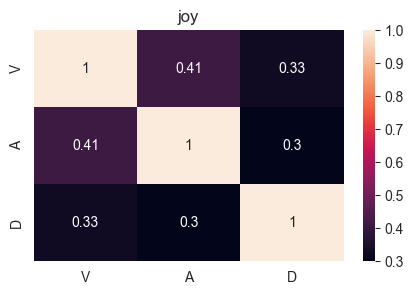

In [374]:
sadness = no_text_data.loc[no_text_data.predicted_emotion == 3]
sadness = sadness[['V', 'A', 'D']]
corr_mat_sadness = sadness.corr().round(2)
plt.figure(figsize=(5,3))
plt.title("joy")
plot = sns.heatmap(corr_mat_sadness, annot=True)

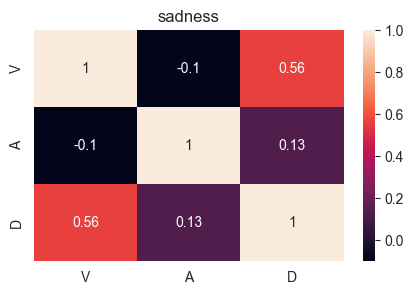

In [375]:
joy = no_text_data.loc[no_text_data.predicted_emotion == 4]
joy = joy[['V', 'A', 'D']]
corr_mat_joy = joy.corr().round(2)
plt.figure(figsize=(5,3))
plt.title("sadness")
plot = sns.heatmap(corr_mat_joy, annot=True)

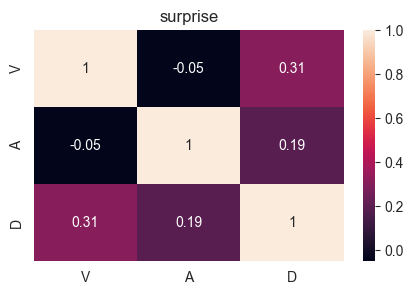

In [376]:
joy = no_text_data.loc[no_text_data.predicted_emotion == 5]
joy = joy[['V', 'A', 'D']]
corr_mat_joy = joy.corr().round(2)
plt.figure(figsize=(5,3))
plt.title("surprise")
plot = sns.heatmap(corr_mat_joy, annot=True)

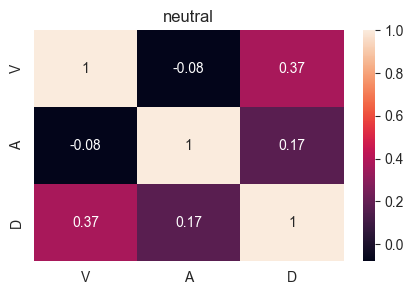

In [377]:
joy = no_text_data.loc[no_text_data.predicted_emotion == 6]
joy = joy[['V', 'A', 'D']]
corr_mat_joy = joy.corr().round(2)
plt.figure(figsize=(5,3))
plt.title("neutral")
plot = sns.heatmap(corr_mat_joy, annot=True)